Goal: update from number to number in MNIST

In [1]:
import bats
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


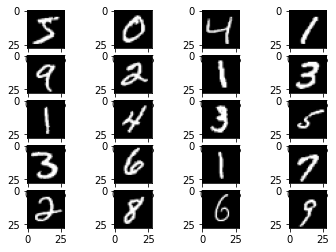

In [3]:
fig = plt.figure()
for i in range(20):  
    fig.add_subplot(5,4, 1 + i)
    plt.imshow(train_X[i], cmap='gray')
plt.show()

In [4]:
def freudenthal_grid(m, n):
    """
    Freudenthal triangulation of a m x n grid
    """
    def _get_idx(i, j):
        """
        get index of grid in row-major order
        """
        return j + n * i;
    
    X = bats.SimplicialComplex()
    for i in range(m-1):
        for j in range(n-1):
            k1 = _get_idx(i,j)
            k2 = _get_idx(i+1,j)
            k3 = _get_idx(i,j+1)
            k4 = _get_idx(i+1,j+1)
            X.add_recursive([k1,k2,k4])
            X.add_recursive([k1,k3,k4])
    return X

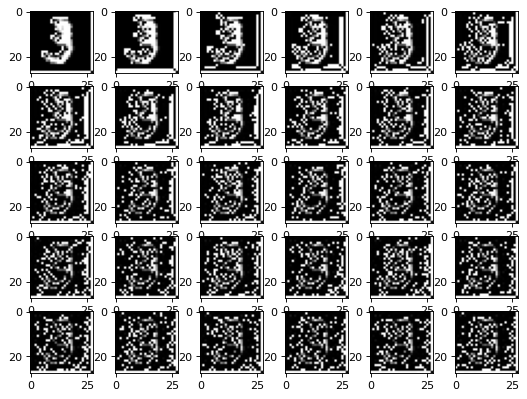

In [5]:
m,n = 28, 28
X = freudenthal_grid(m, n)

lr = 1 # persistence penalty

f = train_X[10]
f = f.flatten()

vals, imap = bats.lower_star_filtration(X, f)
F = bats.FilteredSimplicialComplex(X, vals)
R = bats.reduce(F, bats.F2())

fig = plt.figure(figsize=(8, 6), dpi=80)
for i in range(30):
    f = f.flatten()
    # extend filtration
    vals, imap = bats.lower_star_filtration(X, f)
    # compute persistence
    R.update_filtration(vals)
    # get 1-dimensional pairs
    ps = R.persistence_pairs(1)
    for p in ps:
        d = p.dim()
        bi = imap[d][p.birth_ind()] # maps birth_ind to pixel where it appeared
        di = imap[d+1][p.death_ind()] # maps death_ind to pixel where it appeared
        f[bi] = f[bi] - lr
        f[di] = f[di] + lr
        
    fig.add_subplot(5,6,1 + i)
    plt.imshow(f.reshape(m,n), cmap='gray')
    
plt.show()